#Part 1: Iris Dataset

##Step 1: Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

##Step 2: Load and Prepare the Iris Dataset

In [3]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
'target']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)

In [4]:
# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes
# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [7]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

##Step 3: Define the Neural Network

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, 3) # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)


In [15]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##Step 4: Train the Model

In [16]:
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 1.1065
Epoch 2/20, Loss: 1.0921
Epoch 3/20, Loss: 1.0771
Epoch 4/20, Loss: 1.0446
Epoch 5/20, Loss: 0.9990
Epoch 6/20, Loss: 0.9329
Epoch 7/20, Loss: 0.8296
Epoch 8/20, Loss: 0.7154
Epoch 9/20, Loss: 0.6597
Epoch 10/20, Loss: 0.6187
Epoch 11/20, Loss: 0.5647
Epoch 12/20, Loss: 0.5171
Epoch 13/20, Loss: 0.4944
Epoch 14/20, Loss: 0.4871
Epoch 15/20, Loss: 0.4382
Epoch 16/20, Loss: 0.4058
Epoch 17/20, Loss: 0.3900
Epoch 18/20, Loss: 0.3572
Epoch 19/20, Loss: 0.3409
Epoch 20/20, Loss: 0.3251


##Step 5: Validate the Model

In [18]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9667


## Step 6: Visualize Training Loss and Data Distribution

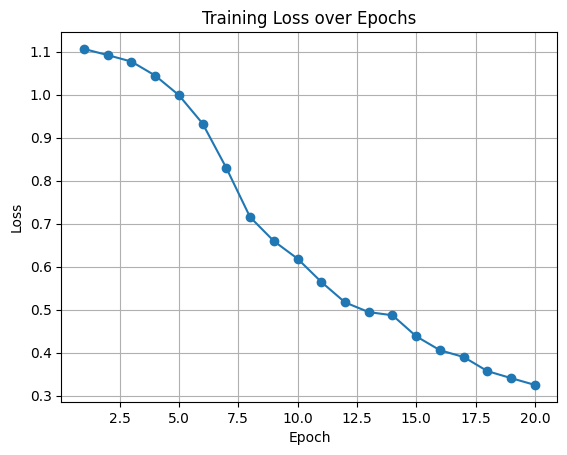

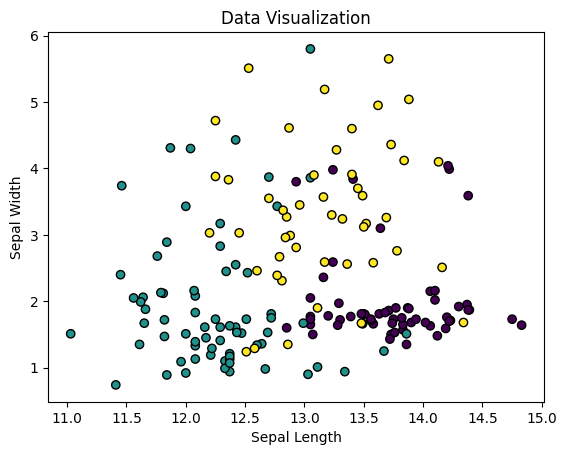

In [64]:
# Plotting training loss (example values, replace with real loss values if collected)
losses = [1.1065, 1.0921, 1.0771, 1.0446, 0.9990, 0.9329, 0.8296, 0.7154, 0.6597, 0.6187, 0.5647,
          0.5171, 0.4944, 0.4871, 0.4382, 0.4058, 0.3900, 0.3572, 0.3409, 0.3251]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Visualization')
plt.show()

#Part 2: Wine Dataset

##Step 1: Import Libraries

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

##Step 2: Load and Prepare the Iris Dataset

In [50]:
columns = ['class', 'Alcohol', 'Malicacid', 'ash', 'Alcalinityofash', 'Magnesium',
'Totalphenols', 'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins',
'Colorintensity', 'Hue', 'OD280/OD315ofdilutedwines', 'Proline']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, names=columns)

In [51]:
# Map target classes to numerical values
df['class'] = df['class'].astype('category').cat.codes
# Split data into features and labels
X = df.iloc[:,1:].values
y = df['class'].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [52]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [54]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

##Step 3: Define the Neural Network

In [55]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, 3) # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)


In [56]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##Step 4: Train the Model

In [57]:
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 1.0938
Epoch 2/20, Loss: 1.0717
Epoch 3/20, Loss: 1.0481
Epoch 4/20, Loss: 1.0157
Epoch 5/20, Loss: 0.9676
Epoch 6/20, Loss: 0.8955
Epoch 7/20, Loss: 0.7953
Epoch 8/20, Loss: 0.6973
Epoch 9/20, Loss: 0.5938
Epoch 10/20, Loss: 0.4958
Epoch 11/20, Loss: 0.4138
Epoch 12/20, Loss: 0.3375
Epoch 13/20, Loss: 0.2647
Epoch 14/20, Loss: 0.1925
Epoch 15/20, Loss: 0.1232
Epoch 16/20, Loss: 0.0705
Epoch 17/20, Loss: 0.0446
Epoch 18/20, Loss: 0.0317
Epoch 19/20, Loss: 0.0243
Epoch 20/20, Loss: 0.0203


##Step 5: Validate the Model

In [58]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


## Step 6: Visualize Training Loss and Data Distribution

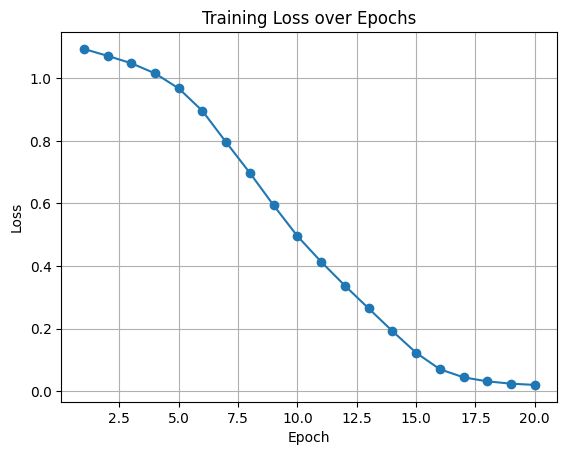

<ipython-input-63-efaf7935b6fe>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1], label=str(i), cmap='viridis', edgecolor='k')


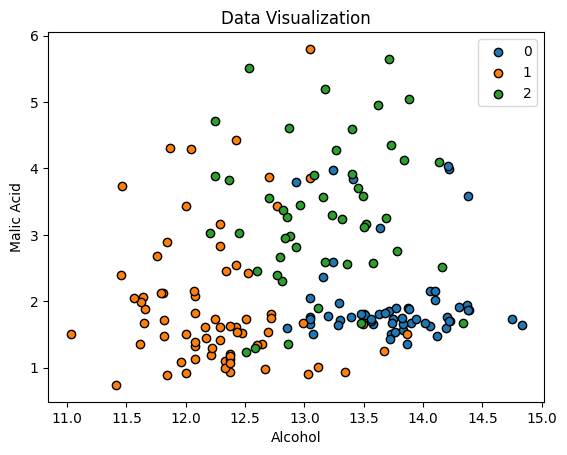

In [63]:
# Plotting training loss (example values, replace with real loss values if collected)
losses = [1.0938, 1.0717, 1.0481, 1.0157, 0.9676, 0.8955, 0.7953, 0.6973, 0.5938, 0.4958, 0.4138, 0.3375,
          0.2647, 0.1925, 0.1232, 0.0705, 0.0446, .0317, 0.0243, 0.0203]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution
for i in df['class'].unique():  # Loop through unique classes
    plt.scatter(X[y == i, 0], X[y == i, 1], label=str(i), cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Data Visualization')
plt.legend()
plt.show()